In [98]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

import time
from sklearn.metrics import confusion_matrix


In [11]:
training_dataset = torchvision.datasets.MNIST(root = './data', train = True, transform = transforms.ToTensor(), download = True)
testing_dataset = torchvision.datasets.MNIST(root = './data', train = False, transform = transforms.ToTensor(), download = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [126]:
#Hyperparameters
batch_size = 32

input_size = 28*28
hidden_size1 = 400
hidden_size2 = 400
output_size = 10


epochs = 4
learning_rate = 0.002

In [127]:
train_loader = torch.utils.data.DataLoader(training_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(testing_dataset, batch_size = batch_size, shuffle = True)

In [128]:
#testing example to get dimensions
ex = iter(train_loader)
sample, label = next(ex)
sample.size() # 28 by 28 picture with 1 dimension (black and white)

torch.Size([32, 1, 28, 28])

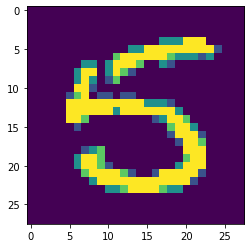

In [129]:
plt.imshow(sample[0][0])

In [130]:
class NeuralNet(nn.Module):
    
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        
        super(NeuralNet, self).__init__()
        
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.layer3 = nn.Linear(hidden_size2, output_size)
        
        self.relu = nn.ReLU()
        
    def forward(self, sample):
        
        out = self.relu(self.layer1(sample))
        out = self.relu(self.layer2(out))
        out = self.layer3(out)
        
        return out
    
    


In [131]:
model = NeuralNet(input_size, hidden_size1, hidden_size2, output_size)

In [132]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [133]:
steps = len(train_loader)

start_time = time.time()
for epoch in range(epochs):
    for i, (image, label) in enumerate(train_loader):
        image = image.reshape(-1,28*28)
        
        output = model(image)
        loss = loss_function(output,label)
        
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1)%100 == 0:
            print(f'epoch: {epoch+1}/{epochs}, step: {i+1}/{steps}, loss:{loss}')
        
        
print(f'Time taken: {time.time()-start_time} seconds')

epoch: 1/4, step: 100/1875, loss:0.6391429901123047
epoch: 1/4, step: 200/1875, loss:0.26829084753990173
epoch: 1/4, step: 300/1875, loss:0.2896983325481415
epoch: 1/4, step: 400/1875, loss:0.2924205958843231
epoch: 1/4, step: 500/1875, loss:0.38004934787750244
epoch: 1/4, step: 600/1875, loss:0.43061378598213196
epoch: 1/4, step: 700/1875, loss:0.10937750339508057
epoch: 1/4, step: 800/1875, loss:0.08167070895433426
epoch: 1/4, step: 900/1875, loss:0.5440568327903748
epoch: 1/4, step: 1000/1875, loss:0.08424112200737
epoch: 1/4, step: 1100/1875, loss:0.02979118563234806
epoch: 1/4, step: 1200/1875, loss:0.29626697301864624
epoch: 1/4, step: 1300/1875, loss:0.09569810330867767
epoch: 1/4, step: 1400/1875, loss:0.12462662160396576
epoch: 1/4, step: 1500/1875, loss:0.03755493089556694
epoch: 1/4, step: 1600/1875, loss:0.2760908007621765
epoch: 1/4, step: 1700/1875, loss:0.011713665910065174
epoch: 1/4, step: 1800/1875, loss:0.1307186335325241
epoch: 2/4, step: 100/1875, loss:0.1724559217

In [134]:
with torch.no_grad():
    prediction_list = torch.tensor([])
    label_list = torch.tensor([])
    
    for image, label in test_loader:
        image = image.reshape(-1,28*28)
        output = model(image)
        value, prediction = torch.max(output,1)
        
        prediction_list = torch.cat((prediction_list,prediction),0)
        label_list = torch.cat((label_list,label),0)


In [135]:
confusion_matrix(label_list,prediction_list)

array([[ 941,    0,    0,    1,    0,    0,    4,    3,    3,   28],
       [   0, 1125,    0,    0,    0,    1,    2,    0,    7,    0],
       [   1,    3, 1007,   11,    3,    0,    0,    3,    4,    0],
       [   0,    0,    4,  997,    0,    2,    0,    2,    2,    3],
       [   0,    1,    3,    0,  965,    0,    4,    0,    4,    5],
       [   3,    1,    0,   20,    1,  857,    5,    0,    3,    2],
       [   2,    2,    0,    1,    2,    4,  943,    0,    4,    0],
       [   1,    7,   10,    5,    1,    0,    0,  999,    2,    3],
       [   0,    1,    3,   12,    1,    5,    0,    2,  943,    7],
       [   0,    4,    0,    7,   13,    0,    1,    6,    1,  977]],
      dtype=int64)

In [136]:
accuracy = (prediction_list == label_list).sum().item() / len(label_list) * 100
accuracy

97.54